In [1]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, IntervalRootFinding 
using CairoMakie, GLMakie

In [3]:
function get_eigen(u, p, jac_system, t = 0.0)
    Ju = jac_system(u, p, t)
    ei_u = eigen(Ju)
    return (fp = u, ei = ei_u)
end
function show_fp_eigen(data)
    println("fixed point: $(data.fp)")
    println("---------------------------------------------------")
    println("eigenvalues: $(data.ei.values)")
    println("---------------------------------------------------")
    println("eigenvectors:")
    show(stdout, "text/plain", data.ei.vectors); println()
    println("---------------------------------------------------"); println()
end
function shift_vec(eifp, col; ϵ = 1e-6, sign_ = +)
    sign_(eifp.fp, real(eifp.ei.vectors[:, 1]) * ϵ)
end;

In [4]:
t = 500.0; tt = 600.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

E = interval(-40, 40); x = interval(0, 1); y = interval(0, 1)
box = IntervalBox(E, x, y);

In [6]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;

In [65]:
U0, I0 = 0.4, -1.4
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [66]:
u0 = [0.6687120689278331, 0.9176952184871904, 0.2224581703372882]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.4, 0.305, 0.3, -1.4]
 time:          0.0
 state:         [0.6687120689278331, 0.9176952184871904, 0.2224581703372882]


In [67]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_)

(3-dimensional StateSpaceSet{Float64} with 1 points, Vector{ComplexF64}[[-9.448367700939315 + 0.0im, 1.779311629967855 - 16.72499986508114im, 1.779311629967855 + 16.72499986508114im]], Bool[0])

In [68]:
ei

1-element Vector{Vector{ComplexF64}}:
 [-9.448367700939315 + 0.0im, 1.779311629967855 - 16.72499986508114im, 1.779311629967855 + 16.72499986508114im]

In [69]:
TM(fp[1], p, 0.0)

3-element SVector{3, Float64} with indices SOneTo(3):
 -1.3664283380001926e-13
  8.881784197001252e-16
 -6.938893903907228e-17

In [38]:
lb_size = 35; tck_size = 30; dis = 60;

In [39]:
eifp = get_eigen(u0, p, jacob_TM_)

(fp = [0.6687120689278331, 0.9176952184871904, 0.2224581703372882], ei = Eigen{Float64, Float64, SMatrix{3, 3, Float64, 9}, SVector{3, Float64}}([-41.07490229804797, -13.114148025808495, -0.30306779527961725], [-0.9999158467937904 -0.6747894201619512 0.0029517614412039035; -0.01297287365234893 -0.7379241757119871 -0.00019151697027760075; 6.228849962218452e-5 0.011276051493413528 0.9999956252032527]))

In [40]:
show_fp_eigen(eifp)

fixed point: [0.6687120689278331, 0.9176952184871904, 0.2224581703372882]
---------------------------------------------------
eigenvalues: [-41.07490229804797, -13.114148025808495, -0.30306779527961725]
---------------------------------------------------
eigenvectors:
3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
 -0.999916    -0.674789    0.00295176
 -0.0129729   -0.737924   -0.000191517
  6.22885e-5   0.0112761   0.999996
---------------------------------------------------



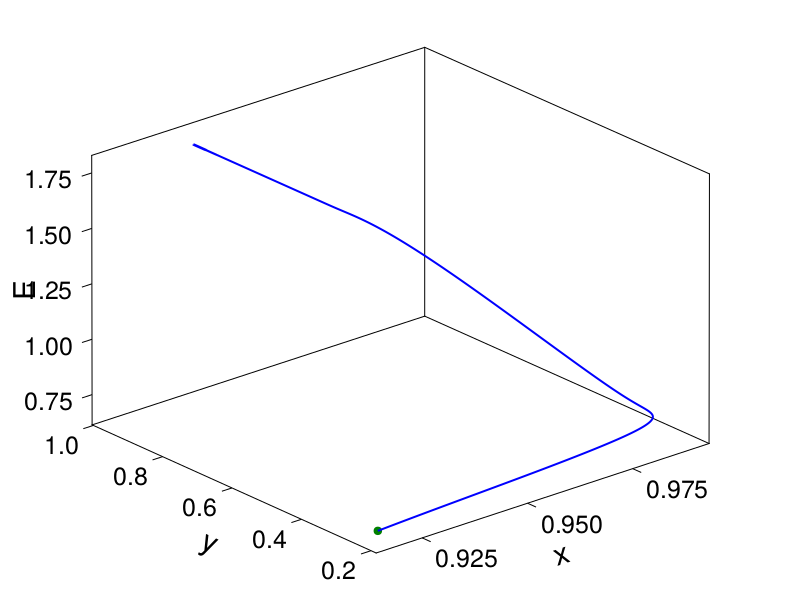

CairoMakie.Screen{IMAGE}


In [41]:
ts, tf = 1, 300000
idx, idy, idz = 2, 3, 1
lb_size = 30; tck_size = 25;
textsize = 40
CairoMakie.activate!()
f = Figure(resolution = (800, 600), title = "?")
axis3_1 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)


scatter!(axis3_1, tr[1, idx], tr[1, idy], tr[1, idz], color = :green)

lines!(axis3_1, tr1[ts:tf, idx], tr1[ts:tf, idy], tr1[ts:tf, idz],
linewidth = 2.0, linestyle = :solid, color = :blue)


display(f)